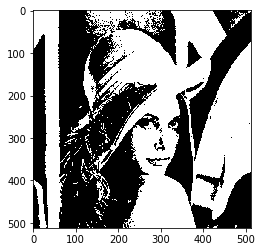

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('lena.bmp')
#用 pyplot 使 Img 顯示在 jupyter notebook 
def imshow(img):
    plt.imshow(img[:,:,::-1])#因為 plt 與 cv 一個是 RGB 另一個是 BGR


#2-1 change into binary image, threshold = 128 

img2 = img.copy()
for i in img2:
    for j in i:
        if j[0] >= 128:
            j[0] = j[1] = j[2] = 255
        else:
            j *= 0
imshow(img2)

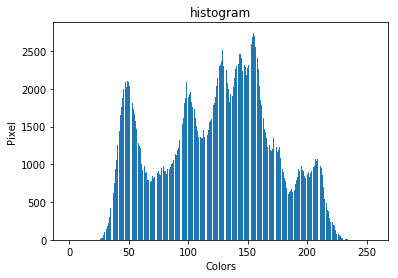

In [2]:
#2-2 histogram
histogram = [0]*256
for i in img:
    for j in i:
        histogram[j[0]] += 1
plt.bar(range(len(histogram)) , histogram) 
plt.xlabel('Colors')
plt.ylabel('Pixel')
plt.title('histogram')
plt.show()

In [3]:
label = np.zeros((512,512))
CC = 1
if img2[0][0][0] == 255:
    label[0][0] = CC
    CC += 1
for j in range(1,len(img2[0])):
    if img2[0][j][0] == 255:
        if label[0][j-1] != 0:
            label[0][j] = label[0][j-1]
        else:
            label[0][j] = CC
            CC += 1
for i in range(1,512):
    for j in range(512):
        if img2[i][j][0] == 255:
            if j == 0:
                if label[i-1][j] != 0:
                    label[i][j] = label[i-1][j]
            else:
                if label[i-1][j] != 0 and label[i][j-1] != 0:
                    label[i][j] = min(label[i-1][j], label[i][j-1])
                    if label[i-1][j] != label[i][j-1]:
                        for k in range(i+1):
                            for l in range(512):
                                if label[k][l] == max(label[i-1][j], label[i][j-1]):
                                    label[k][l] = label[i][j]
                elif label[i-1][j] != 0:
                    label[i][j] = label[i-1][j]
                elif label[i][j-1] != 0:
                    label[i][j] = label[i][j-1]
                else:
                    label[i][j] = CC
                    CC += 1

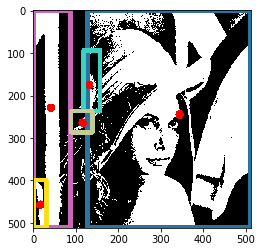

In [4]:
count = np.zeros(CC)
for i in range(512):
    for j in range(512):
        count[int(label[i][j])] += 1
count_big = []
for i in range(1,CC):
    if count[i] >= 500:
        count_big.append(i)
#to give different component different color randomly
color = {}
import random
for i in count_big:
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    color[i] = [r,g,b]
img5 = img2.copy()
for c in count_big:
    #to find the index of each rectangle tmp = [minx, miny, maxx, maxy]
    tmp = [512,512,0,0]
    #find where to put the +
    middle = (0,0)
    for i in range(512):
        for j in range(512):
            if label[i][j] == c:
                middle = (middle[0]+i, middle[1]+j)
                if i < tmp[0]:
                    tmp[0] = i
                if j < tmp[1]:
                    tmp[1] = j
                if i > tmp[2]:
                    tmp[2] = i
                if j > tmp[3]:
                    tmp[3] = j

    middle = (int(middle[1]/count[c]), int(middle[0]/count[c]))
    cv2.circle(img5, middle, 10, (0,0,255), -1)
    cv2.rectangle(img5, (tmp[1],tmp[0]), (tmp[3],tmp[2]),color[c], 10)
imshow(img5)